## Project Overview - Sentiment Analysis 

This project focuses on developing a machine learning model for sentiment analysis of cryptocurrency news, tailored to provide insights for a simple trading bot. The model aims to classify news texts into basic sentiment categories and quantify the strength of these sentiments. The key features and considerations of this project are outlined below:

### Basic Sentiment Classification
- **Objective**: Classify the sentiment of cryptocurrency news articles into 'positive,' 'neutral,' and 'negative.'
- **Importance**: This forms the foundation of our sentiment analysis, crucial for understanding market sentiment and guiding trading decisions.

### Sentiment Intensity Scoring
- **Objective**: Provide a sentiment intensity score to measure how strongly an article expresses a particular sentiment.
- **Relevance to Trading**: This score helps gauge the potential impact of news on cryptocurrency market movements, offering a nuanced view beyond basic categorization.

### Focus on Simplicity and Efficiency
- **Project Context**: As a final portfolio project for Codecademy's Machine Learning course, the aim is to create a model that aligns with the educational goals of the course, emphasizing simplicity and practicality.
- **Integration with Trading Bot**: The model is designed with the potential to integrate with a simple trading bot. 
- **Future Expansion**: While the current scope is kept manageable for educational purposes, the project lays the groundwork for future enhancements and more complex features.

# Sentiment Analysis of Cryptocurrency News Articles
## Introduction

This Jupyter Notebook is focused on the sentiment analysis of cryptocurrency news articles. The objective is to investigate how news content relates to the sentiment and potential market movements in the cryptocurrency domain. Through this analysis, we aim to understand the influence of news articles on cryptocurrency market sentiments and trends.

The dataset, "SahandNZ/cryptonews-articles-with-price-momentum-labels", consists of news articles sourced from Cryptonews.com and Binance.com. It includes the articles' text, publication dates, source URLs, and sentiment labels, providing a comprehensive view of the news impact on cryptocurrency market dynamics.

In the following sections, we will engage in data loading, preprocessing, exploratory data analysis, and building a machine learning model. The goal is to develop a robust model that can accurately interpret and classify the sentiment of each news article and draw meaningful insights about its potential impact on the cryptocurrency market.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Loading the Dataset
This cell loads the dataset 'SahandNZ/cryptonews-articles-with-price-momentum-labels' using the Hugging Face 'datasets' library.


In [2]:
dataset = load_dataset("SahandNZ/cryptonews-articles-with-price-momentum-labels")




### Preparation of Datasets for Machine Learning Workflow

In this project, we have three distinct datasets, each serving a specific purpose in the machine learning workflow:

- **Train Set (`train.csv`)**:
- **Date Range**: October 14, 2022, to March 1, 2023.
- Utilized for training the model, it contains historical data up to the beginning of March 2023.

- **Validation Set (`validation.csv`)**:
- **Date Range**: March 1, 2023, to March 22, 2023.
- Used for validating the model's performance during the tuning phase, it picks up immediately after the training set.

- **Test Set (`test.csv`)**:
- **Date Range**: March 22, 2023, to May 31, 2023.
- Reserved for the final evaluation of the trained model, it covers the period following the validation set.

#### Concatenating Training and Validation Sets

For the initial stages of model development, including feature engineering and Exploratory Data Analysis, we combine the training and validation datasets, this is achieved using the `concatenate_datasets` function from the Hugging Face `datasets` library:


In [3]:
from datasets import concatenate_datasets

# Concatenate only the train and validation data
combined_dataset = concatenate_datasets([dataset['train'], dataset['validation']])



# Displaying Basic Information About the Combined Dataset

This cell displays basic information about the combined dataset. It prints the column names, the total number of entries in the dataset, and an example entry. This information is crucial for understanding the structure of our dataset, including the types of data it contains and a sample of what the data entries look like.


In [4]:
print("Column names:", combined_dataset.column_names)
print("Number of entries:", len(combined_dataset))
print("Example entry:", combined_dataset[0])


Column names: ['datetime', 'text', 'url', 'label']
Number of entries: 162310
Example entry: {'datetime': '2022-10-14', 'text': 'despite fact blockchainbased carbon credit marketplace held auction bear market cryptocurrency demand marketplace token remained high', 'url': 'https://cryptonews.com/news/bitcoin-price-and-ethereum-why-could-btc-go-after-20500.htm', 'label': 1}


# Output of Dataset Structure

The output from the previous cell shows the structure of our combined dataset. It confirms the column names ('datetime', 'text', 'url', 'label'), the total number of entries in the dataset, and provides an example entry. This example gives us a glimpse into the actual data we will be analyzing, including a date, a summarized text of a news article, its source URL, and a label that might indicate the sentiment or impact of the news article.


# Date Validation Function Definition

In this cell, we define the function `validate_date`. This function is responsible for converting strings into datetime objects. It uses the Pandas library's `to_datetime` method with error handling. If the string cannot be converted into a datetime object (due to format issues or other anomalies), the function will return `None`. This ensures that all date entries in our dataset are in a consistent format, which is crucial for any time-based analysis we might perform later on.


In [5]:
import pandas as pd

def validate_date(date_str):
    """
    Attempt to convert a string to a datetime object.
    Returns None if the conversion fails.
    """
    try:
        return pd.to_datetime(date_str, format='%Y-%m-%d', errors='coerce')
    except ValueError:
        return None


## Converting the Dataset to a DataFrame and Applying Date Validation
This cell converts the combined dataset to a Pandas DataFrame and applies the validate_date function to the 'datetime' column. It ensures that all dates are in a consistent and proper datetime format, suitable for time-based analysis.


In [6]:
# Convert the dataset to a Pandas DataFrame
df = pd.DataFrame({column: combined_dataset[column] for column in combined_dataset.column_names})

# Apply the validate_date function to the 'datetime' column
df['ValidDate'] = df['datetime'].apply(validate_date)

# Extract just the date part and store it in a new column
df['DateOnly'] = df['ValidDate'].dt.date


# Checking Text Format Consistency

Before proceeding with further text preprocessing, it's important to check the consistency and quality of the articles in our dataset. In this section, we will sample a few random articles to visually inspect their format. This step is essential to identify any anomalies or variations in the text data that might require additional preprocessing.


In [7]:
import random

# Set a seed for reproducibility
random.seed(0)

# Sample 5 random articles from the 'text' column in the dataset
random_articles = random.sample(list(df['text']), 5)

# Display the sampled articles
print("Randomly sampled articles:")
for i, article in enumerate(random_articles, 1):
    print(f"Article {i}:")
    print(article)
    print("-----------------------------------------------------\n")


Randomly sampled articles:
Article 1:
perhaps time prolonged bull market could see bitcoin peak 1000 recent trough close 15500 anyone would complaining 1000 rally recent lows implies bitcoin nearing 175000 2025
-----------------------------------------------------

Article 2:
according mark lamb ceo coinflex ver owed exchange 47m stablecoin usdc ceo said exchange written contract ver obligating personally guarantee negative equity coinflex account top margin regularly
-----------------------------------------------------

Article 3:
dash 2 trade includes notification service alerts investors new coin listings centralized exchanges providing information previously available elite investors surprise d2t presale numbers phenomenal much potential
-----------------------------------------------------

Article 4:
hayes clarifies position stating btc reserve asset crypto pristine asset liquid centralized lending companies cels frequently call loans selling experiencing financial difficulties


The articles contain a mix of simple and complex vocabulary, technical terms, and potentially domain-specific jargon, indicating a varied level of content complexity.

# Text Data Preprocessing

## Current State of Data
Upon careful review, we have observed that the dataset has already undergone substantial preprocessing. The text data is not only in a summarized format but also appears to be clean and uniformly structured. This initial preprocessing likely includes essential steps like tokenization, normalization, and stopword removal, making the dataset well-prepared for our analysis.

## Preprocessing Conclusion
Given the prepared state of the dataset, we find no necessity for additional preprocessing steps such as further tokenization, normalization, or stopword removal. The data is already in an optimal format for sentiment analysis. 

With the preprocessing phase adequately addressed, we will next embark on Exploratory Data Analysis (EDA). This critical phase will enable us to delve deeper into the dataset, uncovering patterns, trends, and insights that are pivotal for the forthcoming stages of model development and analysis.


# Exploratory Data Analysis (EDA)

In this section, we will dive into Exploratory Data Analysis to gain deeper insights into our dataset. EDA will help us understand the underlying structure and characteristics of the data, which is crucial for informed model building and analysis.

## Key Focus Areas for EDA:

- **Sentiment Distribution:** Understanding how sentiments are distributed across the dataset.
- **Article Length Analysis:** Examining the length of the news articles.
- **Common Words and Phrases:** Identifying frequent words and phrases to discern prevalent topics and themes in the cryptocurrency news domain.
- **Temporal Trends:** Analyzing how the volume and sentiment of articles vary over time.

These insights will not only aid in building a more effective sentiment analysis model but also provide context for interpreting the model's results.


## Sentiment Distribution
Analyzing the sentiment distribution is crucial to understand the balance or skewness in sentiments across the dataset. This insight can inform how we might handle imbalanced data during model training.


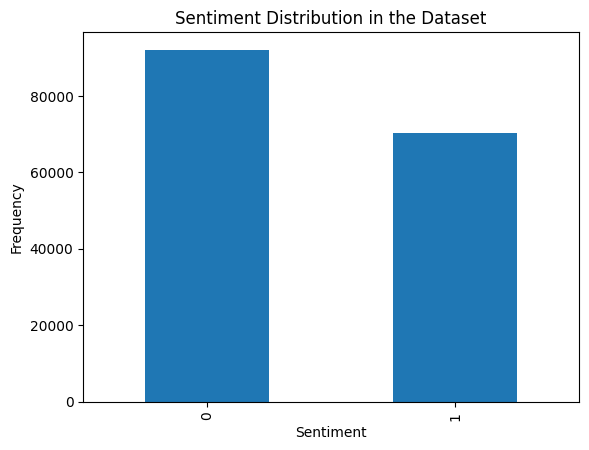

In [8]:
df['label'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution in the Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


## Analysis of Sentiment

The bar chart above presents the distribution of sentiments within cryptocurrency-related news articles, based on our training and validation datasets. Each bar corresponds to a sentiment class, with the frequency of articles in each class displayed.

### Key Observations:

- **Class Imbalance**: There is a noticeable difference in the frequency of articles between the two sentiment classes. The class labeled "0" has a higher occurrence compared to the class labeled "1", suggesting a skew towards a negative sentiment within the dataset.

- **Nature of Cryptocurrency News**: The prevalence of negative sentiment might reflect the nature of the news articles collected during this period. It could indicate that the events or developments in the cryptocurrency market at this time were predominantly viewed negatively.

- **Impact on Model Training**: The imbalance between the sentiment classes will be taken into account during the model training process. Techniques such as class weighting, oversampling of the minority class, or undersampling of the majority class may be applied to address this imbalance.

- **Evaluation Metrics**: Due to the class imbalance, accuracy alone will not be a sufficient metric for model evaluation. Balanced metrics such as the F1 score, precision, recall, and the ROC-AUC curve will be utilized to provide a more holistic view of model performance.

### Concluding Remarks:

The sentiment distribution seen here is instrumental in guiding the development and evaluation of our sentiment analysis model. It underscores the importance of considering the distribution of classes within the dataset and adjusting our model training and validation strategies accordingly.

Further exploration into the reasons behind the sentiment distribution, such as correlating with specific market events or news developments, could offer additional insights. By doing so, we aim to build a model that not only accurately predicts sentiment but also reflects the underlying trends and nuances of cryptocurrency news sentiment.


## Article Length Analysis
Investigating the length of news articles can reveal patterns about the verbosity and content density. This analysis might highlight outliers or specific trends in article length.


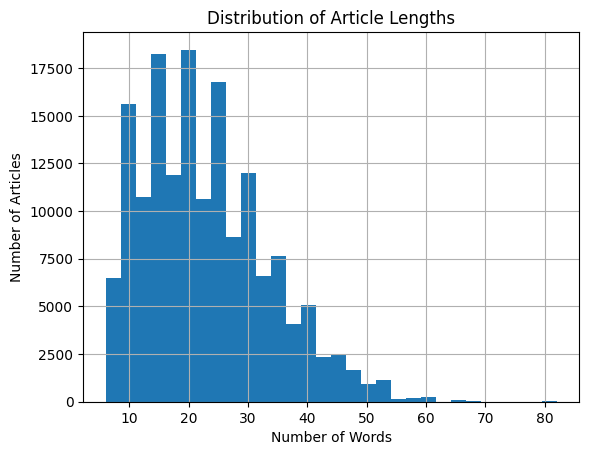

In [9]:
df['article_length'] = df['text'].apply(lambda x: len(x.split()))
df['article_length'].hist(bins=30)
plt.title('Distribution of Article Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Number of Articles')
plt.show()


## Analysis of Article Lengths

The histogram above illustrates the distribution of article lengths across the combined training and validation datasets. Each bin represents the count of articles corresponding to a specific length measured by the number of words.

### Key Observations:

- **Common Article Lengths**: The distribution shows that a majority of the articles fall within a certain range of word counts. Specifically, there is a noticeable concentration of articles with word counts in the lower end of the spectrum.

- **Right-Skewed Distribution**: The distribution is right-skewed, indicating that while most articles are shorter, there is a long tail of articles that are much longer. This skewness points to the presence of detailed reports or analyses among a sea of shorter articles.

- **Implications for Sentiment Analysis**: This varied length distribution suggests that the sentiment conveyed in articles does not depend on their length. Shorter articles can be just as informative and sentiment-laden as longer ones. Therefore, our sentiment analysis model must be adept at extracting sentiment from texts of all lengths.

- **Preprocessing Considerations**: Given the range of article lengths, our text preprocessing strategy must be carefully devised. We want to retain as much informative content as possible, even from shorter articles, without diluting the dataset with overly verbose texts.

- **Feature Engineering**: When engineering features for our model, special attention will be paid to ensure that features capture the sentiment effectively, regardless of article length. This may involve focusing on keyword extraction and contextual understanding rather than relying on word count.

### Concluding Remarks:

The insights gained from the distribution of article lengths will directly influence our approach to building the sentiment analysis model. Recognizing that valuable sentiment can be expressed concisely, we will develop a model and preprocessing pipeline that honor the content's integrity, regardless of length. This analysis reinforces the notion that brevity does not equate to a lack of sentiment or substance in the context of cryptocurrency news articles.


## Common Words and Phrases
Examining common words and phrases can uncover the most frequent topics in the news articles. This helps in understanding the focus areas in the cryptocurrency news domain.


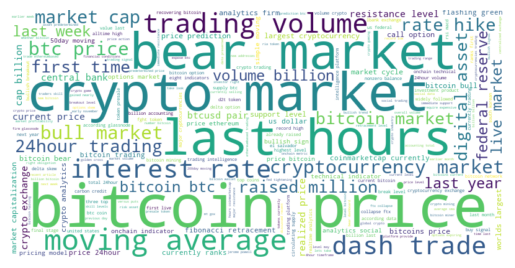

In [10]:
from wordcloud import WordCloud
all_text = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Word Cloud Analysis 

The word cloud presented here is derived from the cryptocurrency-related news articles in our training and validation datasets. It visually encapsulates the frequency of various terms, highlighting the most dominant topics in the discourse.

### Key Observations:

- **Dominant Market Terms**: Words like "bitcoin," "crypto," and "market" dominate the landscape, indicating a strong focus on the cryptocurrency market itself. Their prominence reflects the centrality of these topics in the articles analyzed.

- **Sentiment Indicators**: The presence of "bull" and "bear" points to discussions surrounding market sentiments. These terms are commonly used to describe upward (bullish) and downward (bearish) market trends, suggesting that the articles frequently address the cyclical nature of market optimism and pessimism.

- **Financial Analysis**: Technical financial terms such as "trading," "volume," and "moving average" suggest that the articles provide in-depth analyses, potentially offering trading insights and forecasting market movements.

- **Economic Factors**: The inclusion of terms like "interest rate" and "federal reserve" implies that the articles also consider broader economic factors and monetary policies and their implications on the cryptocurrency space.

- **Temporal Relevance**: Phrases such as "last hours" and "last week" highlight the currency of the news coverage, indicating that the dataset includes articles that respond to recent events or market changes.

### Concluding Remarks:

This word cloud analysis provides a valuable overview of the thematic content within our dataset. It illustrates the key topics that are most discussed in cryptocurrency news articles, reflecting the issues and trends that are top-of-mind for the market. Understanding these prevalent topics helps in anticipating the areas of focus for our sentiment analysis model and underscores the importance of context in interpreting market-related news. The insights from this visual tool are instrumental in shaping our data preprocessing and feature selection strategies, ensuring that our model captures the essence of the market discourse.


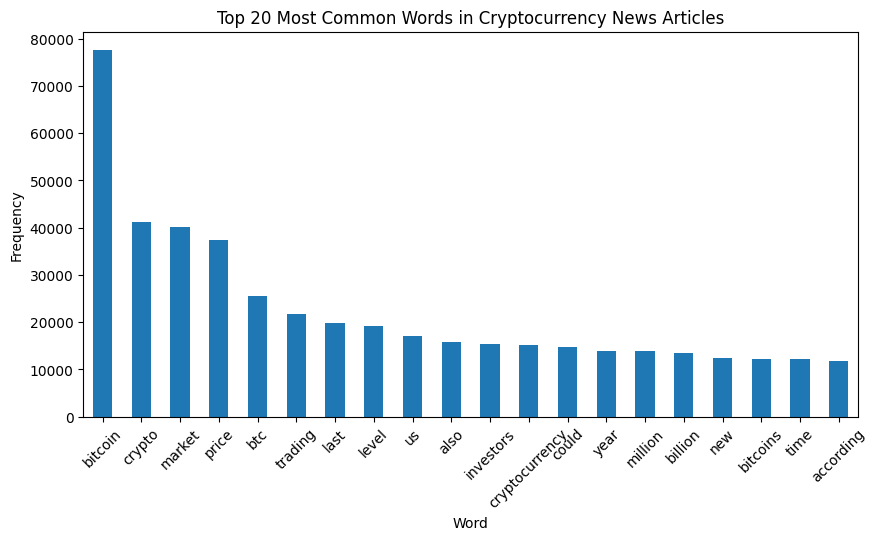

In [11]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Top 20 most common words
all_words = ' '.join(df['text']).split()
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)

# Split the words and their counts into two lists for plotting
words, counts = zip(*most_common_words)

# Create a pandas DataFrame for easy plotting
df_common_words = pd.DataFrame({'Word': words, 'Frequency': counts})

# Plot the DataFrame
df_common_words.set_index('Word').plot(kind='bar', figsize=(10, 5), legend=False)
plt.title('Top 20 Most Common Words in Cryptocurrency News Articles')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


## Analysis of the Top 20 Most Common Words

The bar chart displayed above showcases the frequency of the top 20 most common words within the cryptocurrency news articles from our training and validation sets. This quantitative visualization sheds light on the specific terms that recur most often in the discourse.

### Key Observations:

- **Prevalence of Key Cryptocurrency Terms**: The word "bitcoin" leads in frequency, reflecting its dominance in the cryptocurrency conversation. Accompanying terms such as "crypto," "market," and "price" highlight a strong emphasis on the economic and financial dimensions of the cryptocurrency world.

- **Emphasis on Trading and Finance**: Words like "trading," "btc," along with financial quantifiers "million" and "billion," point towards a narrative rich in trade activities and financial metrics. This aligns with the expected content of articles that delve into market analytics and financial reporting.

- **Contextual Importance of Generic Terms**: While words such as "us," "also," "could," and "new" may initially appear commonplace, they often form part of context-specific phrases that are meaningful within the cryptocurrency discourse. For example, "us" may be part of discussions regarding the U.S. markets or regulations, and "new" often refers to the latest developments in cryptocurrencies or blockchain technology.

- **Significance of Time**: The inclusion of the word "time" implies that the temporal aspect is a significant factor in the articles, an important consideration in the fast-paced and volatile cryptocurrency market context.

### Concluding Remarks:

This common words analysis is instrumental in deciphering the focal points of the discussion within our dataset. It informs our decisions during text preprocessing, helping to distinguish between terms with substantial informational value and those that may be regarded as generic. Furthermore, this analysis lays the groundwork for deeper explorations, such as topic modeling or sentiment analysis, to extract more intricate insights into the narratives surrounding cryptocurrency topics.


## Temporal Trends
Temporal analysis will show how the number of articles and sentiments change over time, which may indicate market reactions to certain events or general trends in the cryptocurrency domain.


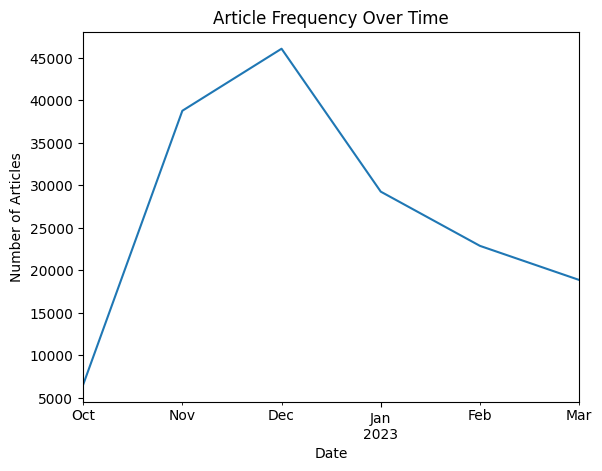

In [12]:
df.set_index('ValidDate')['text'].resample('M').count().plot()
plt.title('Article Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


## Interpretation of Temporal Trends in Article Production

The line chart, "Article Frequency Over Time," depicts the number of cryptocurrency-related news articles published monthly. This visual representation captures the ebb and flow of article production within the training and validation sets timeframe.

### Key Observations:

- **Peak Publishing Activity**: The noticeable peak in December indicates a surge in the publication of articles, which could correspond to key events or developments in the cryptocurrency market during that month.

- **Variable News Production**: The rise and fall in the number of articles over the months reflect the dynamic nature of news production, potentially aligning with the fluctuating interest and activity in the cryptocurrency domain.

- **Downtrend in Article Production**: The chart shows a downtrend in article frequency starting in January, continuing into February, and ending in March. This trend may mirror the natural fluctuation of news cycles or could be influenced by specific events in the cryptocurrency sector during those months.

### Concluding Insights:

The trend line captured in this graph offers a macroscopic view of the cryptocurrency news cycle over the selected months. It provides a foundation for further investigation into the forces that drive media focus on cryptocurrency. By correlating these publishing trends with key market events and price movements, we can gain a deeper understanding of how news coverage relates to and potentially influences the cryptocurrency market.

In summary, this analysis of article frequency over time can help identify critical periods of heightened journalistic activity, which may be indicative of significant events worth exploring in greater detail to comprehend their impact on the cryptocurrency landscape.


## Sentiment Over Time Analysis

In the following analysis, we aim to understand how the sentiment expressed in cryptocurrency-related news articles has evolved over time. We perform a temporal analysis that might reveal patterns, trends, or anomalies in the dataset, potentially corresponding to market movements or key events in the cryptocurrency sector.

### Code Explanation:

1. **Datetime Conversion**:
   We have already ensured, in a previous step, that all entries in the 'datetime' column of our DataFrame are proper datetime objects. This standardization is crucial for accurate time series analysis.

2. **Indexing by Datetime**:
   The 'datetime' column is then set as the index of our DataFrame, allowing us to leverage pandas' powerful time series functionalities.

3. **Monthly Resampling**:
   We resample our data on a monthly basis to count the number of articles associated with each sentiment label for each month. This aggregation gives us a clearer view of the sentiment trends over an extended period.

4. **Value Counts and Stacking**:
   We count the number of occurrences of each sentiment label ('0' for negative, '1' for positive) within these monthly intervals. Using the `unstack` method, we prepare the data for a stacked bar chart, which presents both positive and negative sentiments in a single column for each month, differentiated by color.

5. **Visualization**:
   The resulting DataFrame is plotted as a stacked bar chart, which visually represents the monthly distribution of sentiments. The chart's title, axes labels, and legend are set to make the plot self-explanatory.

By examining the fluctuations in the number of articles with different sentiments over time, we can infer periods of increased optimism or pessimism in the cryptocurrency domain. Such insights could be valuable for understanding the public sentiment's impact on market behavior or for predicting future market trends based on histormore nuanced conclusions.

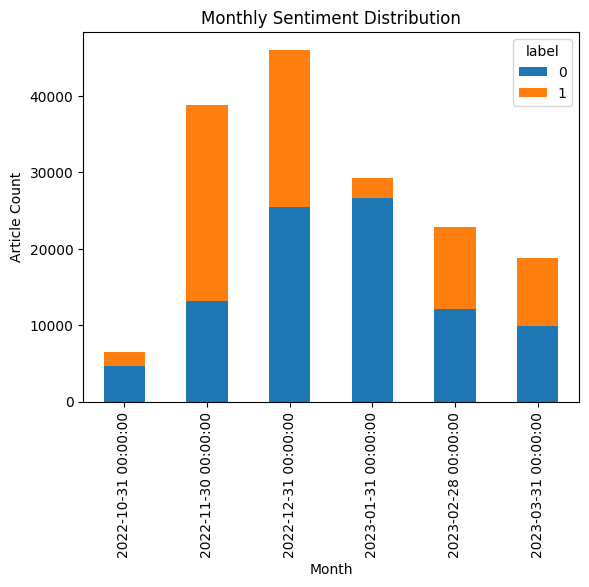

In [13]:
import pandas as pd

# Convert the 'datetime' column to datetime objects and handle errors
# Note: Since you've already validated the dates, you might not need to re-convert them
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Drop rows with NaT in 'datetime' if any exist after coercion
df = df.dropna(subset=['datetime'])

# Set the 'datetime' column as the index
df.set_index('datetime', inplace=True)

# Verify if the index is a DatetimeIndex
if not isinstance(df.index, pd.DatetimeIndex):
    raise TypeError("Index is not a DatetimeIndex")

# Group by the index with a monthly frequency and count the occurrences
monthly_sentiment = df.groupby([pd.Grouper(freq='M'), 'label']).size().unstack(fill_value=0)
# Check the actual counts per month

# Plot the results
monthly_sentiment.plot(kind='bar', stacked=True)
plt.title('Monthly Sentiment Distribution')
plt.xlabel('Month')
plt.ylabel('Article Count')
plt.show()

## Monthly Sentiment Distribution Analysis

The "Monthly Sentiment Distribution" graph illustrates the number of cryptocurrency-related news articles categorized by sentiment over time. Each stacked bar represents a month's total articles, segmented into negative (blue) and positive (orange) sentiments.

### Key Observations:

- **Sentiment Fluctuations**: The distribution shows how sentiment in cryptocurrency news varies from month to month. Notably, some months exhibit a higher prevalence of negative sentiment, while others show a more balanced distribution between negative and positive sentiments (0 = negative, 1 = positive).

- **Market Dynamics Reflection**: The varying heights of sentiment categories could reflect underlying market conditions. Periods with a higher count of negative sentiment articles may correspond with market downturns or unfavorable industry events, while more balanced or positive-leaning months could indicate bullish market trends or optimistic industry developments.

- **Interpreting Imbalances**: The presence of both sentiments in each month underlines the diversity of views within the cryptocurrency news space. However, the imbalances observed also suggest that sentiment may be swayed by transient events, which could have implications for market sentiment and investor behavior.

### Concluding Insights:

This sentiment distribution provides a valuable perspective on the emotional tone conveyed by the news media over the analyzed period. It reveals the pulse of the cryptocurrency market as captured by journalists and can serve as an indicator of the market's sentiment trajectory.

By understanding these patterns, we gain insights into the potential impact of news on market sentiment and investor decisions. This analysis is crucial for building a sentiment analysis model that accurately interprets the nuances of market sentiment and for investors seeking to understand the sentiment trends that may influence market dynamics.

## Summary of EDA for Cryptocurrency News Sentiment

Through our exploratory data analysis, we've uncovered several intriguing patterns and correlations in the cryptocurrency news dataset that offer insights into the dynamics of market sentiment as reflected in media coverage.

**Correlation Between Article Frequency and Sentiment**:
When comparing the "Article Frequency Over Time" and "Monthly Sentiment Distribution" plots, one might look for months where an increase in the number of articles correlates with a shift in sentiment. For example, if a peak in article volume aligns with a peak in positive sentiment, this could indicate that a particularly favorable event occurred, driving both increased coverage and a positive outlook.

**Impact of Article Length on Sentiment**:
By examining both the "Distribution of Article Lengths" and "Sentiment Distribution" plots, it's possible to speculate whether shorter or longer articles tend to be more positive or negative. For instance, if shorter articles dominate and there's a prevalence of negative sentiment, one could hypothesize that brief updates may be focused on immediate, potentially negative market reactions.

**Common Words as Sentiment Indicators**:
The "Top 20 Most Common Words" plot alongside the "Monthly Sentiment Distribution" may reveal that certain terms are more prevalent in months with a particular sentiment bias. Words like "bull" may appear more in months with positive sentiment, while "bear" may be more common in negative months.

**Word Frequency and Article Volume**:
The "Top 20 Most Common Words" plot can be juxtaposed with the "Article Frequency Over Time" plot to see if increases in article volume correspond to increased mentions of certain key terms. For instance, an increase in the use of the word "price" during a peak in article volume might indicate a period of significant price volatility.

**Sentiment Consistency Across Time**:
The general sentiment trend, seen in the "Sentiment Distribution in the Dataset" plot, could be compared with temporal trends to see if the sentiment is consistent over time or if it changes with the frequency of article publication. A consistently negative sentiment over months with varying article volumes could suggest underlying pessimism in the market.


We have now concluded the Exploratory Data Analysis (EDA) on the combined training and validation datasets. This phase has provided us with valuable insights into the distribution of sentiments, the frequency of articles over time, the distribution of article lengths, and the commonality of specific words within our corpus of cryptocurrency-related news article
The insights garnered from the EDA will guide us as we move forward with developing our machine learning pipeline. In the subsequent stages of model building and validation, we will revisit EDA to ensure that our model is robust and that our findings remain consistent across different data splits. This iterative approach to EDA is a cornerstone of a rigorous machine learning workflow, ensuring that our final model is both accurate and reliable.